In [1]:
import pandas as pd


In [7]:
df = pd.read_csv('cancer_reg.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte

UnicodeDecodeError occurs because the CSV file contains characters that the default 'utf-8' encoding cannot interpret. so in order to overcome this error I looked up on the internet and found the following code:

In [2]:
df = pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1')

In [3]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


Here I will start off by filtering the data because there is alot of coloumns that are not needed that just over over complicate things. Such as lower and upper confidence interval for death rate.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df = df.drop(['TARGET_deathRate', 'PctWhite', 'PctBlack','PctWhite','PctOtherRace'], axis=1)

In [6]:
df = df.drop(['PctAsian'], axis=1)

In [88]:
df = df.drop(['popEst2015'], axis=1)

KeyError: "['popEst2015'] not found in axis"

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgDeathsPerYear         3047 non-null   int64  
 1   incidenceRate            3047 non-null   float64
 2   medIncome                3047 non-null   int64  
 3   popEst2015               3047 non-null   int64  
 4   povertyPercent           3047 non-null   float64
 5   studyPerCap              3047 non-null   float64
 6   MedianAge                3047 non-null   float64
 7   MedianAgeMale            3047 non-null   float64
 8   MedianAgeFemale          3047 non-null   float64
 9   Geography                3047 non-null   object 
 10  AvgHouseholdSize         3047 non-null   float64
 11  PercentMarried           3047 non-null   float64
 12  PctHS25_Over             3047 non-null   float64
 13  PctBachDeg25_Over        3047 non-null   float64
 14  PctPrivateCoverageAlone 

Agian here I'm working on removing unessory data we dont need.

The only data Needed for this study

In [ ]:
 
#  1   incidenceRate            3047 non-null   float64
#  2   medIncome                3047 non-null   int64  
#  3   popEst2015               3047 non-null   int64  
#  4   povertyPercent           3047 non-null   float64
#  5   studyPerCap              3047 non-null   float64
#  6   MedianAge                3047 non-null   float64
#  7   MedianAgeMale            3047 non-null   float64
#  8   MedianAgeFemale          3047 non-null   float64
#  10  AvgHouseholdSize         3047 non-null   float64
#  11  PercentMarried           3047 non-null   float64
#  12  PctHS25_Over             3047 non-null   float64
#  13  PctBachDeg25_Over        3047 non-null   float64
#  14  PctPrivateCoverageAlone  2438 non-null   float64
#  15  PctPublicCoverageAlone   3047 non-null   float64
#  16  PctMarriedHouseholds     3047 non-null   float64
#  17  BirthRate                3047 non-null   float64
# dtypes: float64(14), int64(3), object(1)
# memory usage: 428.6+ KB

In [145]:


df = df[['incidenceRate', 'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge','AvgHouseholdSize', 'PercentMarried', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctPrivateCoverageAlone', 'PctPublicCoverageAlone', 'PctMarriedHouseholds', 'BirthRate']]

df

,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,AvgHouseholdSize,PercentMarried,PctHS25_Over,PctBachDeg25_Over,PctPrivateCoverageAlone,PctPublicCoverageAlone,PctMarriedHouseholds,BirthRate
1,411.600000,48127,18.6,23.111234,33.0,2.34,44.5,26.0,22.7,53.8,15.3,45.372500,4.333096
2,349.700000,49348,14.6,47.560164,45.0,2.62,54.2,29.0,16.0,43.5,21.1,54.444868,3.729488
3,430.400000,44243,17.1,342.637253,42.8,2.52,52.7,31.6,9.3,40.3,25.0,51.021514,4.603841
4,350.100000,49955,12.5,0.000000,48.3,2.34,57.8,33.4,15.0,43.9,22.7,54.027460,6.796657
5,505.400000,52313,15.6,180.259902,45.4,2.58,50.4,30.4,11.9,38.8,20.2,51.220360,4.964476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,453.549422,46961,12.4,0.000000,44.2,2.08,51.0,32.2,15.2,54.9,13.2,51.063830,7.773512
3043,453.549422,48609,18.8,377.175494,30.4,2.90,52.6,23.1,12.4,53.3,17.7,52.007937,8.186470
3044,453.549422,51144,15.0,1968.959926,30.9,3.04,54.8,23.0,12.8,52.6,16.8,55.153949,7.809192
3045,453.549422,50745,13.3,0.000000,39.0,2.56,58.8,36.1,14.4,56.3,14.0,58.484232,7.582938


In [146]:

df
df = df.dropna()

Now were ready to create and train the model.

I will no

In [147]:
x = df[['medIncome','povertyPercent','studyPerCap','MedianAge','AvgHouseholdSize','PercentMarried','PctHS25_Over','PctBachDeg25_Over','PctPrivateCoverageAlone','PctPublicCoverageAlone','PctMarriedHouseholds','BirthRate']]


In [148]:
x

,medIncome,povertyPercent,studyPerCap,MedianAge,AvgHouseholdSize,PercentMarried,PctHS25_Over,PctBachDeg25_Over,PctPrivateCoverageAlone,PctPublicCoverageAlone,PctMarriedHouseholds,BirthRate
1,48127,18.6,23.111234,33.0,2.34,44.5,26.0,22.7,53.8,15.3,45.372500,4.333096
2,49348,14.6,47.560164,45.0,2.62,54.2,29.0,16.0,43.5,21.1,54.444868,3.729488
3,44243,17.1,342.637253,42.8,2.52,52.7,31.6,9.3,40.3,25.0,51.021514,4.603841
4,49955,12.5,0.000000,48.3,2.34,57.8,33.4,15.0,43.9,22.7,54.027460,6.796657
5,52313,15.6,180.259902,45.4,2.58,50.4,30.4,11.9,38.8,20.2,51.220360,4.964476
...,...,...,...,...,...,...,...,...,...,...,...,...
3042,46961,12.4,0.000000,44.2,2.08,51.0,32.2,15.2,54.9,13.2,51.063830,7.773512
3043,48609,18.8,377.175494,30.4,2.90,52.6,23.1,12.4,53.3,17.7,52.007937,8.186470
3044,51144,15.0,1968.959926,30.9,3.04,54.8,23.0,12.8,52.6,16.8,55.153949,7.809192
3045,50745,13.3,0.000000,39.0,2.56,58.8,36.1,14.4,56.3,14.0,58.484232,7.582938


In [169]:
y = df ['incidenceRate']
y.median()

np.float64(453.5494221)

Here I created two data frame x and y. x being the indepedant variables. y being the dependant variable and I want to investigate the impact of the x data on y data 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4, random_state=101)

Here I split the  x and y data in trainging data and testing data. The training data is the data I will use to build my model. The test data is the data I will use to test how effective my model is.

In [152]:
lm = LinearRegression()
lm.fit(x_train,y_train)  #train and fit model to training data 

LinearRegression()

In [153]:
print(lm.intercept_)

321.0883683448676


In [154]:
lm.coef_ #viewing coefficient in which each one relates to the coloumns in x

array([ 3.79681370e-04,  9.68279363e-02,  5.34485989e-03,  4.16397661e-02,
       -3.61646444e+00,  1.37015770e+00,  1.41475965e+00, -9.12987452e-01,
        2.67970768e+00,  2.53415294e+00, -3.13451996e+00, -2.21657540e+00])

In [155]:
cdf = pd.DataFrame(lm.coef_,x.columns, columns=['Coeff'])

In [156]:
cdf

,Coeff
medIncome,0.000380
povertyPercent,0.096828
studyPerCap,0.005345
MedianAge,0.041640
AvgHouseholdSize,-3.616464
PercentMarried,1.370158
PctHS25_Over,1.414760
PctBachDeg25_Over,-0.912987
PctPrivateCoverageAlone,2.679708
PctPublicCoverageAlone,2.534153


In [170]:
predictions = lm.predict(x_test) # pass data model has never seen

In [171]:
predictions

array([474.84429621, 460.06341359, 459.24374978, 470.43041698,
       442.37309021, 456.90416591, 474.21451553, 432.27602144,
       428.78460274, 434.11875036, 423.68409982, 453.66815911,
       457.15265663, 446.48932586, 476.74241064, 470.21423263,
       462.45695862, 458.96733973, 432.57471405, 398.33078934,
       437.87440869, 461.34333123, 468.57313923, 464.05969353,
       464.4356553 , 466.86625584, 441.79381262, 420.90755001,
       424.22454529, 450.8715277 , 455.26299908, 439.34333963,
       435.18449721, 476.522972  , 455.13899571, 431.66665733,
       354.11836229, 459.27472193, 424.42199253, 435.93497638,
       424.51629523, 399.32620617, 477.22514537, 417.02483568,
       450.90117789, 456.622253  , 448.41804419, 456.56681819,
       448.15986454, 442.99396378, 422.18253444, 475.63563277,
       460.32262547, 435.61276156, 462.88844074, 460.73256621,
       435.44898565, 399.77380398, 479.73336439, 471.51319132,
       443.21873172, 469.61163853, 445.80552785, 450.84

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

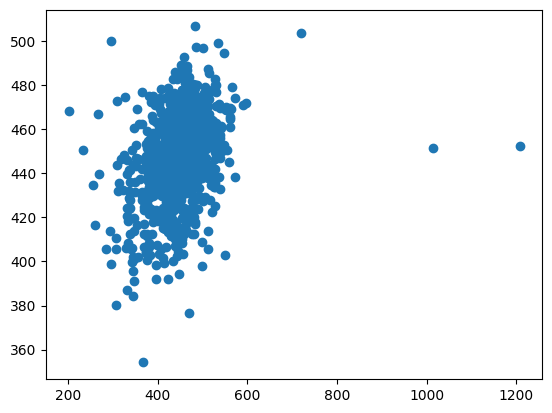

In [173]:
plt.scatter(y_test, predictions)

In [174]:
import seaborn as sns

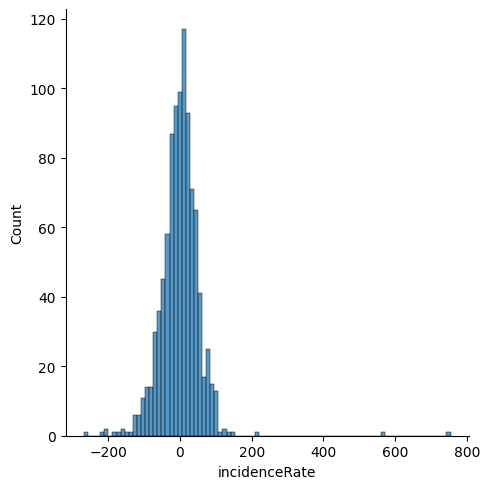

In [175]:
sns.displot((y_test-predictions))

In [176]:
from sklearn import metrics

In [177]:
metrics.mean_absolute_error(y_test,predictions)

np.float64(38.15383432697353)

In [178]:
metrics.mean_squared_error(y_test,predictions)

np.float64(3316.944195298194)

In [179]:
import math
import numpy as np

In [180]:
np.sqrt(metrics.mean_squared_error(y_test,predictions)) #for root mean squared error

np.float64(57.592917926583596)